In [42]:
import tensorflow as tf
from tensorflow import keras
import keras.backend as K
from keras.layers import Input, Dense, Reshape, Activation, concatenate
from keras.models import Model


import numpy as np

# Testing

In [ ]:
from tensorflow import keras
import numpy as np


def in_convex_hull(point, plane_point, plane_normal):
    if np.dot(plane, (point - a)) == 1:
        return true
    return false

def custom_loss(actual, pred):
    loss = 0
    return loss
def custom_layer():
    return

model = keras.Sequential([keras.layers.Dense(units=1, input_shape=[3])])
model.add(keras.layers.Dense(1000))
model.add(keras.layers.Dense(24))
model.compile(optimizer='Adam', loss='BinaryCrossentropy', metrics = ["accuracy"])

xs = np.array([np.random.rand(3) for i in range(800)])
ys = np.array([np.eye(1)[np.random.choice(1)] for i in range(800)])

history = model.fit(xs, ys, epochs=10, batch_size=1, verbose = 1)

# Create Training Data

In [ ]:
n_features = 12
X, y = make_blobs(5000, n_features=n_features, centers=3, cluster_std=3)

var_names = []
for j in range(1, n_features+1):
    var_names.append('feature_' + str(j))

adata = ann.AnnData(X=X)
adata.var.index = var_names

In [43]:
xs = np.array([[ 0.0, 0.0, 0.0],
               [ 0.1, 0.1, 0.1],
               [ 0.1, 0.0, 0.0],
               [ 0.0, 0.1, 0.0],
               [ 0.0, 0.0, 0.1],
               [ 1.0, 1.0, 1.0],
               [-1.0,-1.0,-1.0],
               [ 1.0, 0.0, 0.0],
               [ 0.0, 1.0, 0.0],
               [ 0.0, 0.0, 1.0]])
ys = np.array([[1],
               [1],
               [1],
               [1],
               [1],
               [-1],
               [-1],
               [-1],
               [-1],
               [-1]])

In [44]:
print(xs.shape, ys.shape)

(10, 3) (10, 1)


# Custom Loss function to check if Inputs are in hull

Wrinting custom loss function https://towardsdatascience.com/how-to-create-a-custom-loss-function-keras-3a89156ec69b

Using input in loss https://stackoverflow.com/questions/55445712/custom-loss-function-in-keras-based-on-the-input-data

Point inside the hull is 1, outside -1

In [45]:
def custom_loss(xs):
    def loss(y_true, y_pred):
        # calculate loss, using y_pred
        y_pred_fin = np.array([])
        print(y_true)
        print(xs, y_true, y_pred)
        for each in xs:
            # Weight*(Bias-Input)
            
            y_pred_fin.append(fin)
        return y_pred_fin
        
    return loss

# Custom Activation Function

In [46]:
def ownDot(x):
    return x[0] * (x[1] + x[2])

# Build Model and fit

https://stackoverflow.com/questions/46397258/how-to-merge-sequential-models-in-keras-2-0

https://www.educative.io/answers/how-to-merge-two-different-models-in-keras

https://stackoverflow.com/questions/35533395/keras-how-to-feed-input-directly-into-other-hidden-layers-of-the-neural-net-tha

https://faroit.com/keras-docs/1.2.2/layers/core/#activation

In [53]:
dimensions = xs.shape[1]
nhp = dimensions + 1

model1_in = Input(shape=(dimensions,), name = "defhp_input")
#al_1 = Dense((nhp)*64, activation = "relu", name = "a_layer_1")(defhp)
model1_1 = Dense((nhp)*2, activation = "relu", name = "a_layer_2")(model1_in)
model1_out = Reshape((nhp,2,3))(model1_1)

model2_in = Input(shape=(4,2,3,), name = "coords_input")

concatenated = concatenate([model1_out,model2_in])
# out = Activation(1,activation="tanh")(concatenated)

merged = Model(inputs = [model1_in, model2_in], outputs = concatenated, name = "merged model")
merged.compile(loss='binary_crossentropy', optimizer='adam', 
metrics=['accuracy'])
merged.summary
# xs = np.array([[ 0.0, 0.0, 0.0]])
# ys = np.array([[1]])
merged.fit([xs, xs], y=ys, batch_size=1, epochs=20,
             verbose=1, validation_split=0.1, shuffle=True)

ValueError: Exception encountered when calling layer "reshape_25" (type Reshape).

total size of new array must be unchanged, input_shape = [8], output_shape = [4, 2, 3]

Call arguments received by layer "reshape_25" (type Reshape):
  • inputs=tf.Tensor(shape=(None, 8), dtype=float32)

In [38]:
dimensions = xs.shape[1]
nhp = dimensions + 1

model = keras.models.Sequential()

model.add(Dense(1, input_shape=(dimensions,), activation='relu'))
model.add(Dense((nhp)*64, activation = "relu"))
model.add(Dense((nhp)*2, activation = "relu"))
model.add(Reshape((nhp,2)))
model.add(Activation(activation="tanh"))

#model.compile(optimizer='Adam', loss=custom_loss(xs), metrics = ["accuracy"])
model.compile(optimizer='Adam', loss="hinge", metrics = ["accuracy"])

# xs = np.array([[ 0.0, 0.0, 0.0]])
# ys = np.array([[1]])


In [39]:
history = model.fit(xs, ys, epochs=500, batch_size=1, verbose = 0)
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 1)                 4         
                                                                 
 dense_16 (Dense)            (None, 256)               512       
                                                                 
 dense_17 (Dense)            (None, 8)                 2056      
                                                                 
 reshape_19 (Reshape)        (None, 4, 2)              0         
                                                                 
 activation_10 (Activation)  (None, 4, 2)              0         
                                                                 
Total params: 2,572
Trainable params: 2,572
Non-trainable params: 0
_________________________________________________________________


In [40]:
xs_test = np.array([[ 0.0, 0.0, 0.0]])

model.predict(xs_test)

1/1 [==============================] - 0s 40ms/step


array([[[0.        , 0.9992884 ],
        [0.        , 0.        ],
        [0.        , 0.        ],
        [0.99944466, 0.        ]]], dtype=float32)

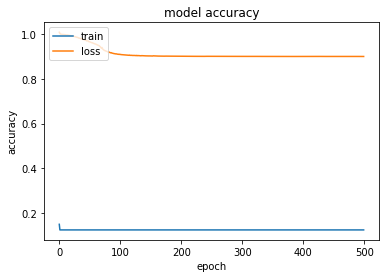

In [41]:
from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'loss'], loc='upper left')
plt.show()

In [ ]:
print(history.history)

Old Style